In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm
import pandas as pd
%matplotlib widget

In [ ]:
#Lets just look and see if we have 'differences' of judgement for at home vs at lab; tetris vs not tetris.

In [2]:
FOLDER = '/Volumes/Secondary/PhDStudy_Results'

# Define the getFSS function
def getFSS(s):
    return (s['FSS1'] + s['FSS2'] + s['FSS3'] + s['FSS4'] + s['FSS5'] + s['FSS6'] + s['FSS7'] + s['FSS8'] + s['FSS9'])/9.0

# Number of participants
n_participants = 25

# Initialize our 3D numpy array
data = np.zeros((2, 2, n_participants))
flow_array = np.zeros((2, 2, n_participants))

# Process each user's data
for user in range(n_participants):
    try:
        with open(FOLDER + '/P' + str(user + 1) + '_Processed.pickle', 'rb') as handle:
            print('\nProcessing User:', user + 1)
            session_data, entrance, exit = pickle.load(handle)
            temp_data = []

            for session in session_data:
                try:
                    for k in session['surveys']:
                        try:
                            flow = session['surveys'][k]['flow']
                            FSS = getFSS(session['surveys'][k])
                            # Use a tuple to represent (flow, FSS)
                            temp_data.append((flow, FSS))
                        except Exception as e:
                            continue
                except Exception as e:
                    continue

            if len(temp_data) != 4:
                print(f'User {user + 1} data is invalid.')
                continue

            # Assign the results to the numpy array in the order (lab, tetris) -> (lab, flow) -> (home, tetris) -> (home, flow)
            for i in range(2):
                for j in range(2):
                    data[i, j, user] = temp_data[i * 2 + j][1]  # Use FSS score as the result
                    if (temp_data[i * 2 + j][0] in ['true', 'Y']): 
                        flow_array[i, j, user] = 1  # Use FSS score as the result
            print(f'User {user + 1} data processed successfully.')

    except Exception as e:
        print(f'Failed to process User {user + 1} data. Error: {str(e)}')

# Find the indices where all values are zero for a given participant
mask = np.any(data.reshape(-1, n_participants) != 0, axis=0)

# Apply the mask to remove those participants
data = data[:,:,mask]
flow_array = flow_array[:,:,mask]


Processing User: 1
User 1 data is invalid.

Processing User: 2
User 2 data processed successfully.

Processing User: 3
User 3 data processed successfully.
Failed to process User 4 data. Error: [Errno 2] No such file or directory: '/Volumes/Secondary/PhDStudy_Results/P4_Processed.pickle'

Processing User: 5
User 5 data processed successfully.

Processing User: 6
User 6 data processed successfully.

Processing User: 7
User 7 data processed successfully.
Failed to process User 8 data. Error: [Errno 2] No such file or directory: '/Volumes/Secondary/PhDStudy_Results/P8_Processed.pickle'

Processing User: 9
User 9 data processed successfully.
Failed to process User 10 data. Error: [Errno 2] No such file or directory: '/Volumes/Secondary/PhDStudy_Results/P10_Processed.pickle'

Processing User: 11
User 11 data processed successfully.

Processing User: 12
User 12 data processed successfully.

Processing User: 13
User 13 data processed successfully.
Failed to process User 14 data. Error: [Errno

In [3]:
data.shape

(2, 2, 18)

In [4]:
# Calculate the total number of states for each condition
total_states_home = flow_array[0,:,:].size
total_states_lab = flow_array[1,:,:].size
total_states_tetris = flow_array[:,0,:].size
total_states_flow = flow_array[:,1,:].size

# Calculate the number of flow states for each condition
flow_states_home = np.sum(flow_array[0,:,:])
flow_states_lab = np.sum(flow_array[1,:,:])
flow_states_tetris = np.sum(flow_array[:,0,:])
flow_states_flow = np.sum(flow_array[:,1,:])

# Calculate the percentage of flow states for each condition
percentage_flow_home = (flow_states_home / total_states_home) * 100
percentage_flow_lab = (flow_states_lab / total_states_lab) * 100
percentage_flow_tetris = (flow_states_tetris / total_states_tetris) * 100
percentage_flow_flow = (flow_states_flow / total_states_flow) * 100

# Print the results
print(f'Flow states at home: {flow_states_home}/{total_states_home} ({percentage_flow_home:.2f}%)')
print(f'Flow states at lab: {flow_states_lab}/{total_states_lab} ({percentage_flow_lab:.2f}%)')
print(f'Flow states while playing Tetris: {flow_states_tetris}/{total_states_tetris} ({percentage_flow_tetris:.2f}%)')
print(f'Flow states while doing flow activity: {flow_states_flow}/{total_states_flow} ({percentage_flow_flow:.2f}%)')

#4 nos tetris/lab
#4 nos flow/lab
#6 nos tetris/home
#3 nos flow/home

Flow states at home: 28.0/36 (77.78%)
Flow states at lab: 28.0/36 (77.78%)
Flow states while playing Tetris: 26.0/36 (72.22%)
Flow states while doing flow activity: 30.0/36 (83.33%)


                               sum_sq    df         F    PR(>F)
C(environment)               0.617284   1.0  0.686977  0.410095
C(activity)                  0.175583   1.0  0.195407  0.659857
C(environment):C(activity)   0.198217   1.0  0.220596  0.640089
Residual                    61.101509  68.0       NaN       NaN


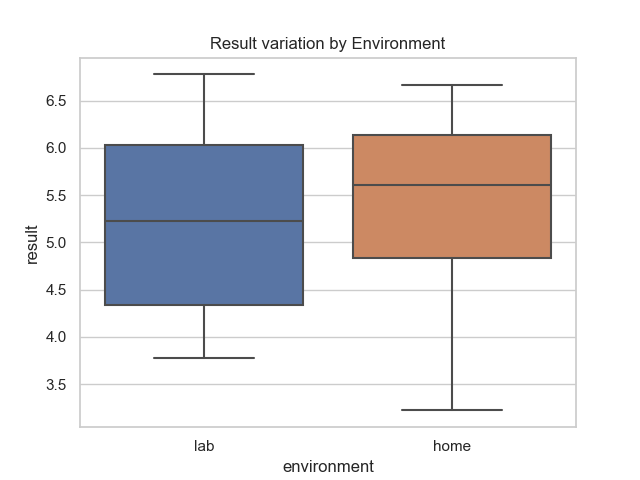

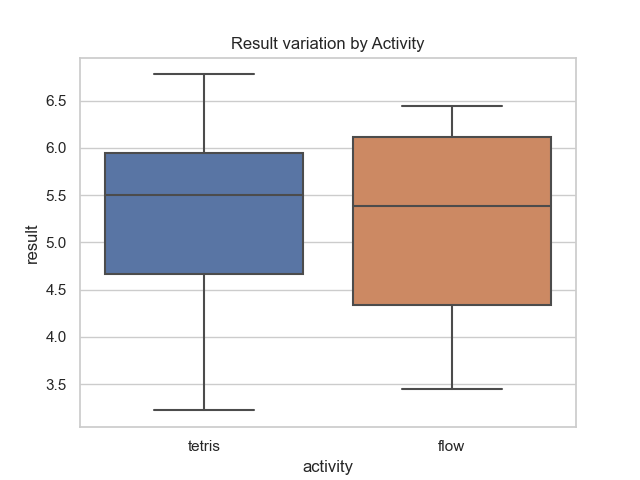

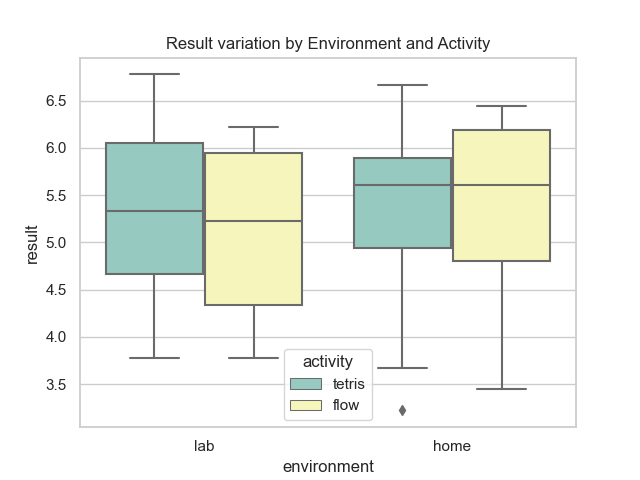

In [5]:
# Assuming you have a 3D numpy array data named `data`
# We will first convert it into a pandas DataFrame for easier manipulation


# Convert the 3D numpy array into a 1D array
data_reshaped = data.reshape(-1)

# Calculate the number of participants
n_participants = data.shape[2]

# Create lists for 'environment', 'activity' and 'participant' of the same length as data_reshaped
environment = (['lab', 'lab', 'home', 'home'] * n_participants)[:len(data_reshaped)]
activity = (['tetris', 'flow', 'tetris', 'flow'] * n_participants)[:len(data_reshaped)]
participant = (np.repeat(range(1, n_participants + 1), 4).tolist())[:len(data_reshaped)]

df = pd.DataFrame({
    'result': data_reshaped,
    'environment': environment,
    'activity': activity,
    'participant': participant
})

# Perform two-way ANOVA
model = ols('result ~ C(environment) + C(activity) + C(environment):C(activity)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Plotting the results
sns.set(style="whitegrid", color_codes=True)

# Boxplot for environment
plt.figure()
sns.boxplot(x='environment', y='result', data=df)
plt.title('Result variation by Environment')
plt.show()

# Boxplot for activity
plt.figure()
sns.boxplot(x='activity', y='result', data=df)
plt.title('Result variation by Activity')
plt.show()

# Boxplot for environment and activity
plt.figure()
sns.boxplot(x='environment', y='result', hue='activity', data=df, palette="Set3")
plt.title('Result variation by Environment and Activity')
plt.show()

In [6]:
#this only runs on my laptop; issue installing minqa and lmer4 for R on the desktop.

from pymer4.models import Lmer

dimensions = data.shape
data_reshaped = data.reshape(-1)
flow_data_reshaped = flow_array.reshape(-1)

# generating factors
environment = ['home', 'lab'] * int(dimensions[1]*dimensions[2])
activity = ['tetris', 'flow'] * int(dimensions[0]*dimensions[2])
participant = np.repeat(range(1, dimensions[2] + 1), dimensions[0]*dimensions[1])

# creating dataframe
df = pd.DataFrame({
    'flow_state': flow_data_reshaped,
    'result': data_reshaped,
    'environment': environment,
    'activity': activity,
    'participant': participant
})


# Initialize model object and fit it
model = Lmer('result ~ activity + (1|participant) + (1|environment)', data=df)
model.fit()

# print model summary
print(model.summary())

PackageNotInstalledError: The R package "lmerTest" is not installed.